In [1]:
#Assignment 

In [2]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import export_text


                   
                  


In [3]:

#load the datasets
df=pd.read_csv("Copy of heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
df['num']

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [5]:
#check missing value
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [49]:
#take a summary
summary=df.describe()
summary

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
#check dtypes of data
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [7]:
df['oldpeak '] = df['oldpeak'].fillna(df['oldpeak'].median())



In [8]:
df['oldpeak '].isna().sum()

0

In [9]:
df.isna().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
oldpeak      0
dtype: int64

<Axes: >

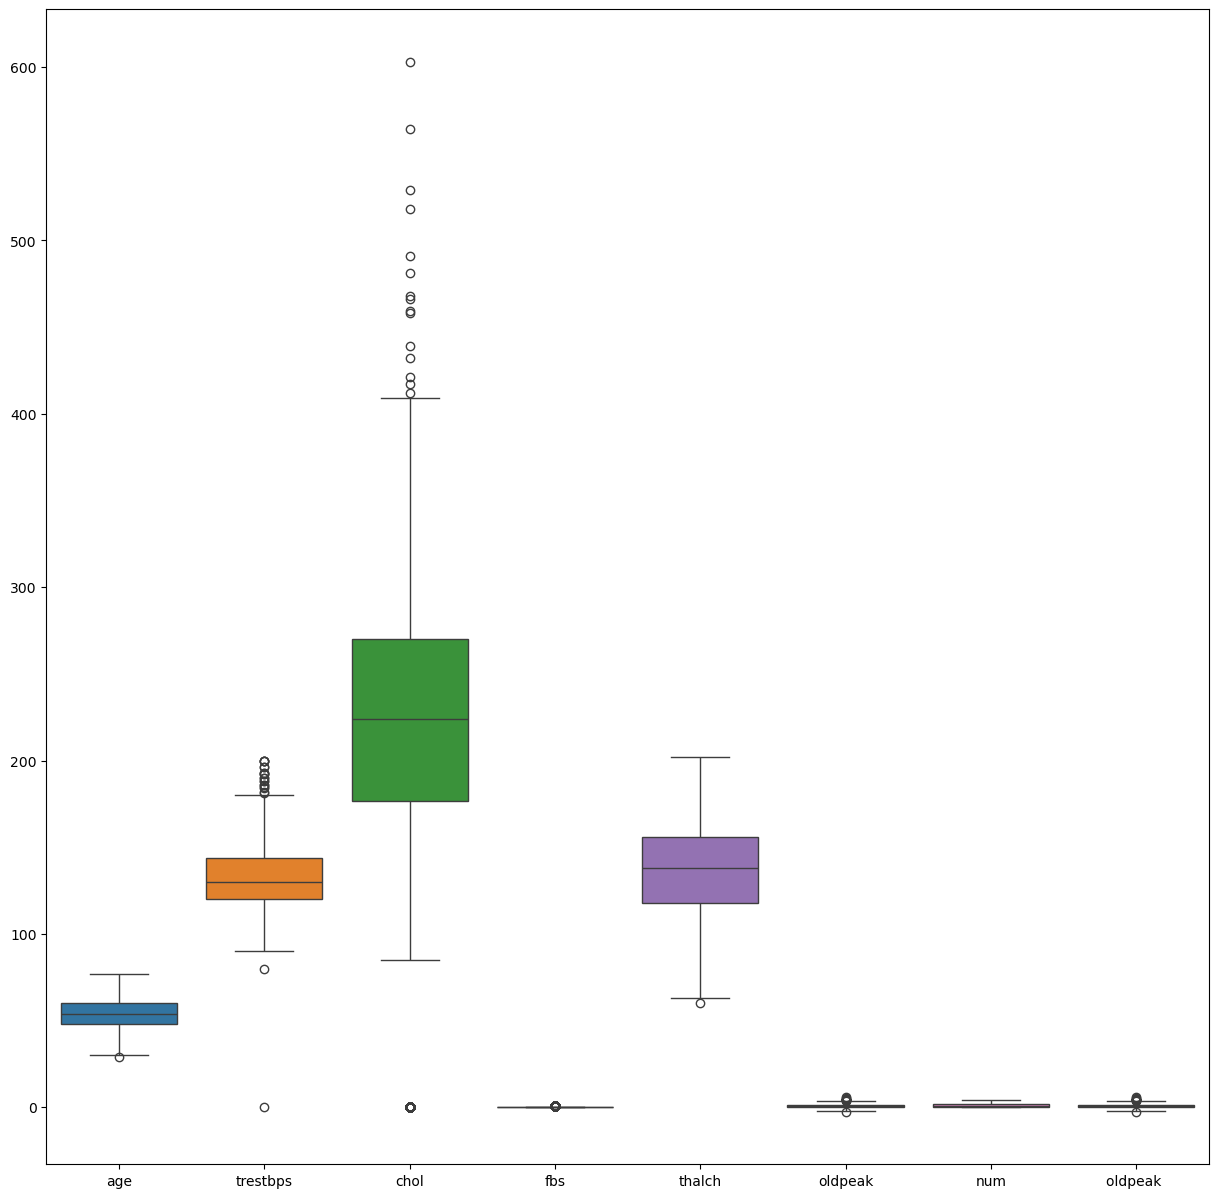

In [10]:
#visulization
plt.figure(figsize=(15,15))
sns.boxplot(df)

In [11]:
#value count
df['age'].value_counts()

age
54    51
58    43
55    41
57    38
56    38
52    36
59    35
51    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    22
65    21
44    19
47    19
42    18
45    18
38    16
39    15
67    15
66    13
40    13
69    13
37    11
68    10
35     9
70     7
74     7
36     6
71     5
72     4
34     4
75     3
32     2
31     2
76     2
77     2
29     1
73     1
33     1
30     1
Name: count, dtype: int64

In [12]:
df['sex'].value_counts()

sex
Male      718
Female    190
Name: count, dtype: int64

In [13]:
df['cp'].value_counts()

cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

In [14]:
df['trestbps'].value_counts()

trestbps
120    128
130    114
140    100
110     58
150     55
      ... 
163      1
107      1
174      1
185      1
182      1
Name: count, Length: 85, dtype: int64

In [15]:
df['chol'].value_counts()

chol
0      172
230      9
211      9
223      9
219      9
      ... 
165      1
161      1
139      1
385      1
109      1
Name: count, Length: 228, dtype: int64

In [16]:
df['fbs'].value_counts()

fbs
False    723
True     185
Name: count, dtype: int64

In [17]:
df['restecg'].value_counts()	

restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

In [18]:
df['thalch'].value_counts()

thalch
140    42
150    41
120    36
130    30
160    25
       ..
190     1
91      1
185     1
195     1
69      1
Name: count, Length: 122, dtype: int64

In [19]:
df['exang'].value_counts()

exang
FALSE    535
TRUE     337
TURE      36
Name: count, dtype: int64

In [20]:
df['oldpeak'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2.3
1      0.0
2      0.4
3      0.0
4      1.5
      ... 
903    1.5
904    3.0
905    2.5
906    NaN
907    NaN
Name: oldpeak, Length: 908, dtype: float64>

<Axes: xlabel='num', ylabel='count'>

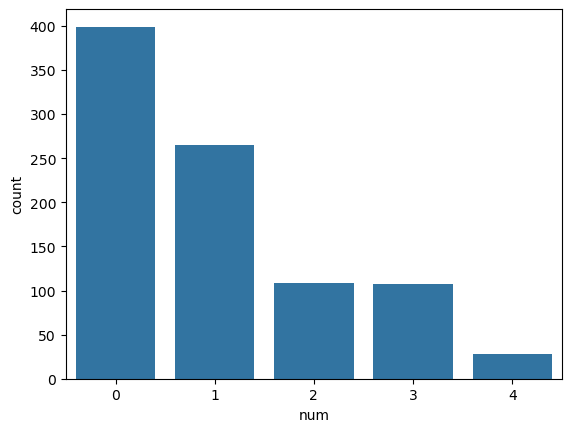

In [65]:
#visulize using countplot
sns.countplot(x='num',data=df)   

In [21]:
#quantify the relationship between variables
df.corr(numeric_only=True)

,age,trestbps,chol,fbs,thalch,oldpeak,num,oldpeak
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493,0.217942
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251,0.134945
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813,0.032205
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268,0.008154
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058,-0.112624
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577,1.000000
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000,0.406078
oldpeak,0.217942,0.134945,0.032205,0.008154,-0.112624,1.000000,0.406078,1.000000


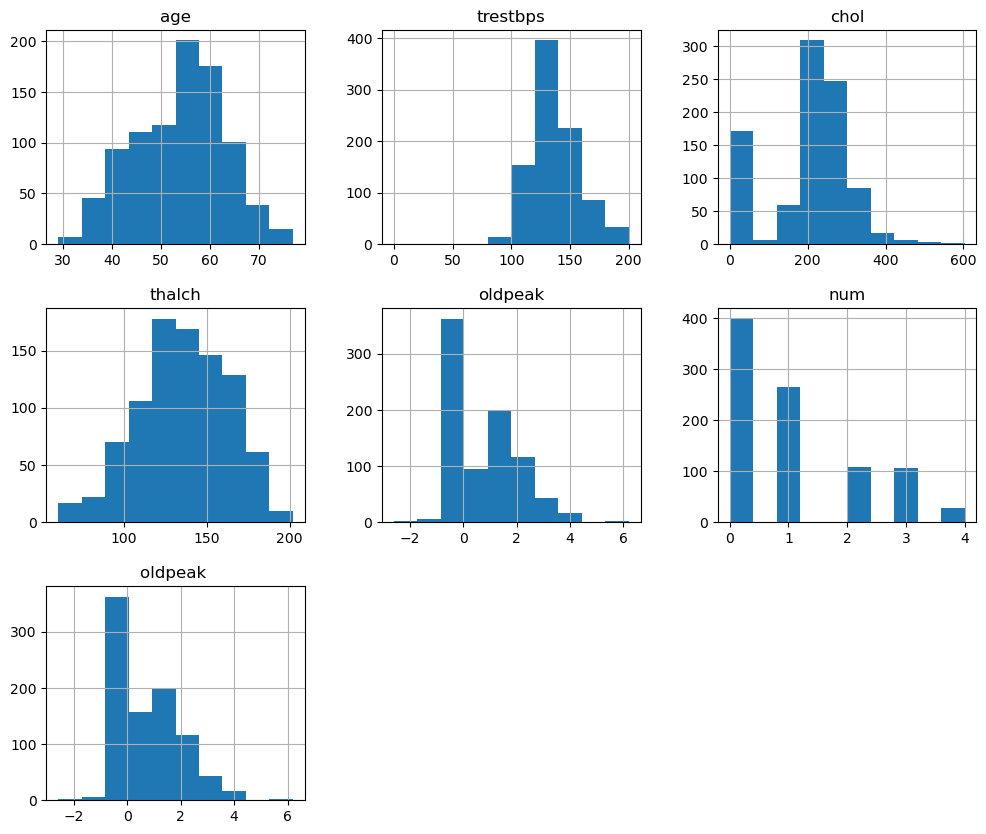

In [22]:
# Visualize distributions
df.hist(figsize=(12,10))
plt.show()


In [23]:
#select categorical feature
category=df.select_dtypes(include=['object','category'])
category

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,normal,FALSE,flat,fixed defect
3,Male,typical angina,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,normal,TRUE,flat,fixed defect
...,...,...,...,...,...,...
903,Male,asymptomatic,normal,FALSE,upsloping,reversable defect
904,Male,asymptomatic,st-t abnormality,TRUE,flat,reversable defect
905,Male,non-anginal,lv hypertrophy,TRUE,downsloping,reversable defect
906,Male,non-anginal,st-t abnormality,TURE,downsloping,fixed defect


In [49]:
 #labEncoding categorical variables
label_encoders = {}
categorical_columns = ['sex', 'cp', 'restecg','slope', 'fbs','exang','thal']  # Modify as per your dataset
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df[col]


0      0
1      0
2      0
3      0
4      0
      ..
903    2
904    2
905    2
906    0
907    2
Name: thal, Length: 908, dtype: int64

In [50]:
# Scaling numerical features

scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'oldpeak']  # Modify as per your dataset
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df[numerical_columns]


,age,trestbps,chol,oldpeak
0,1.006027,0.567394,0.281297,1.288612
1,-1.397560,0.076967,0.013526,-0.815249
2,0.350503,0.322181,-0.084656,-0.449360
3,-0.195767,-0.756760,-0.138211,-0.815249
4,0.350503,-1.149102,-0.004325,0.556834
...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,0.556834
904,0.896773,1.597292,-0.281021,1.928917
905,0.241249,1.793463,-1.798388,1.471556
906,0.241249,0.518352,0.058155,NaN


In [51]:
from sklearn.model_selection import train_test_split
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,oldpeak
0,1.006027,1,3,0.567394,0.281297,1,0,150,0,1.288612,0,0,2.3
1,-1.397560,1,1,0.076967,0.013526,0,1,132,0,-0.815249,1,0,0.0
2,0.350503,1,0,0.322181,-0.084656,0,1,148,0,-0.449360,1,0,0.4
3,-0.195767,1,3,-0.756760,-0.138211,0,0,190,0,-0.815249,1,0,0.0
4,0.350503,1,0,-1.149102,-0.004325,0,1,126,1,0.556834,1,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,1,0,-0.413461,-1.798388,0,1,120,0,0.556834,2,2,1.5
904,0.896773,1,0,1.597292,-0.281021,0,2,120,1,1.928917,1,2,3.0
905,0.241249,1,2,1.793463,-1.798388,0,0,123,1,1.471556,0,2,2.5
906,0.241249,1,2,0.518352,0.058155,1,2,105,2,NaN,0,0,0.5


In [53]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [54]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,oldpeak
84,-1.288306,1,1,-0.658674,0.834689,0,1,162,0,-0.815249,2,1,0.0
10,-2.599354,0,3,1.793463,0.316999,0,2,170,0,-0.815249,0,0,0.0
617,2.207820,1,2,0.322181,0.316999,1,1,94,0,-0.815249,2,2,0.0
250,-1.397560,1,0,-1.443359,-1.798388,0,2,111,0,-0.815249,1,1,0.0
869,-0.523529,1,2,0.175052,-0.530941,0,1,68,0,NaN,1,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.006027,0,2,0.076967,0.450885,0,0,172,0,-0.815249,2,1,0.0
270,-1.834576,0,1,-0.658674,0.522290,0,1,130,0,-0.815249,0,2,0.0
860,-0.632783,1,0,0.322181,1.539818,0,1,159,1,0.556834,2,0,1.5
435,0.350503,1,1,1.008779,0.272371,0,0,164,0,-0.815249,2,1,0.0


In [55]:
y_train

84     0
10     0
617    1
250    0
869    3
      ..
106    0
270    0
860    3
435    1
102    0
Name: num, Length: 726, dtype: int64

In [56]:
y_test.shape

(182,)

In [57]:
y_test

865    3
439    1
342    0
736    2
785    3
      ..
580    1
868    3
445    1
786    3
25     0
Name: num, Length: 182, dtype: int64

In [58]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,oldpeak
865,1.006027,1,2,-0.168247,-1.798388,0,2,111,1,-0.815249,1,1,0.0
439,0.459757,1,0,1.793463,-1.798388,1,2,105,1,-0.815249,0,1,0.0
342,-1.397560,1,1,-0.658674,0.798987,0,2,160,0,-0.815249,0,2,0.0
736,0.787519,1,0,0.616437,0.352702,0,1,148,1,1.928917,0,1,3.0
785,0.022741,1,0,-1.149102,0.040303,0,0,108,1,-0.815249,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,-0.195767,1,0,0.322181,0.575844,0,1,134,1,1.014195,1,2,2.0
868,1.224535,1,0,-0.364418,0.986426,0,0,156,0,NaN,0,2,0.5
445,-0.086513,1,0,0.322181,0.013526,1,0,155,1,2.020390,0,2,3.1
786,0.022741,1,0,-0.560589,0.754358,0,0,116,1,2.111862,1,1,3.2


In [59]:
X_train.shape

(726, 13)

In [60]:
y_train.value_counts()

num
0    310
1    217
3     90
2     87
4     22
Name: count, dtype: int64

In [61]:

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0], dtype=int64)

In [62]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\nentropy = 1.938\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.25, 0.5, 'x[9] <= 0.786\nentropy = 2.076\nsamples = 408\nvalue = [86, 163, 71, 70, 18]'),
 Text(0.125, 0.16666666666666666, 'entropy = 1.922\nsamples = 265\nvalue = [73, 115, 41, 31, 5]'),
 Text(0.375, 0.16666666666666666, 'entropy = 2.142\nsamples = 143\nvalue = [13, 48, 30, 39, 13]'),
 Text(0.75, 0.5, 'x[4] <= -0.741\nentropy = 1.338\nsamples = 318\nvalue = [224.0, 54.0, 16.0, 20.0, 4.0]'),
 Text(0.625, 0.16666666666666666, 'entropy = 2.164\nsamples = 38\nvalue = [8, 12, 9, 7, 2]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.089\nsamples = 280\nvalue = [216, 42, 7, 13, 2]')]

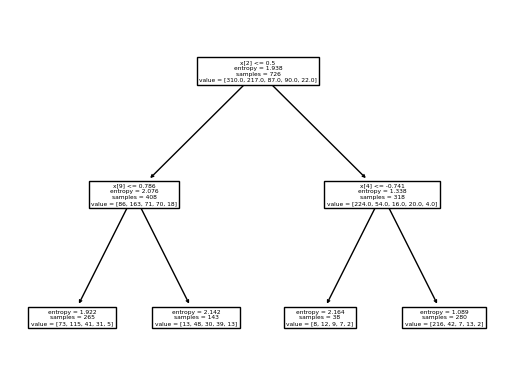

In [63]:
#PLot the decision tree
tree.plot_tree(model)


In [64]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


<Axes: >

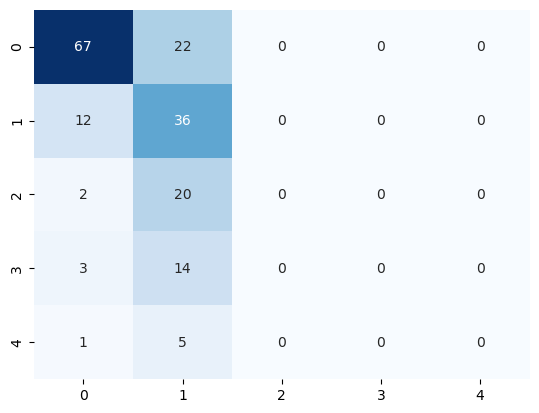

In [65]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d',cbar=False)





In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        89
           1       0.37      0.75      0.50        48
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.23      0.30      0.25       182
weighted avg       0.48      0.57      0.51       182



C:\Users\srush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\srush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\srush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


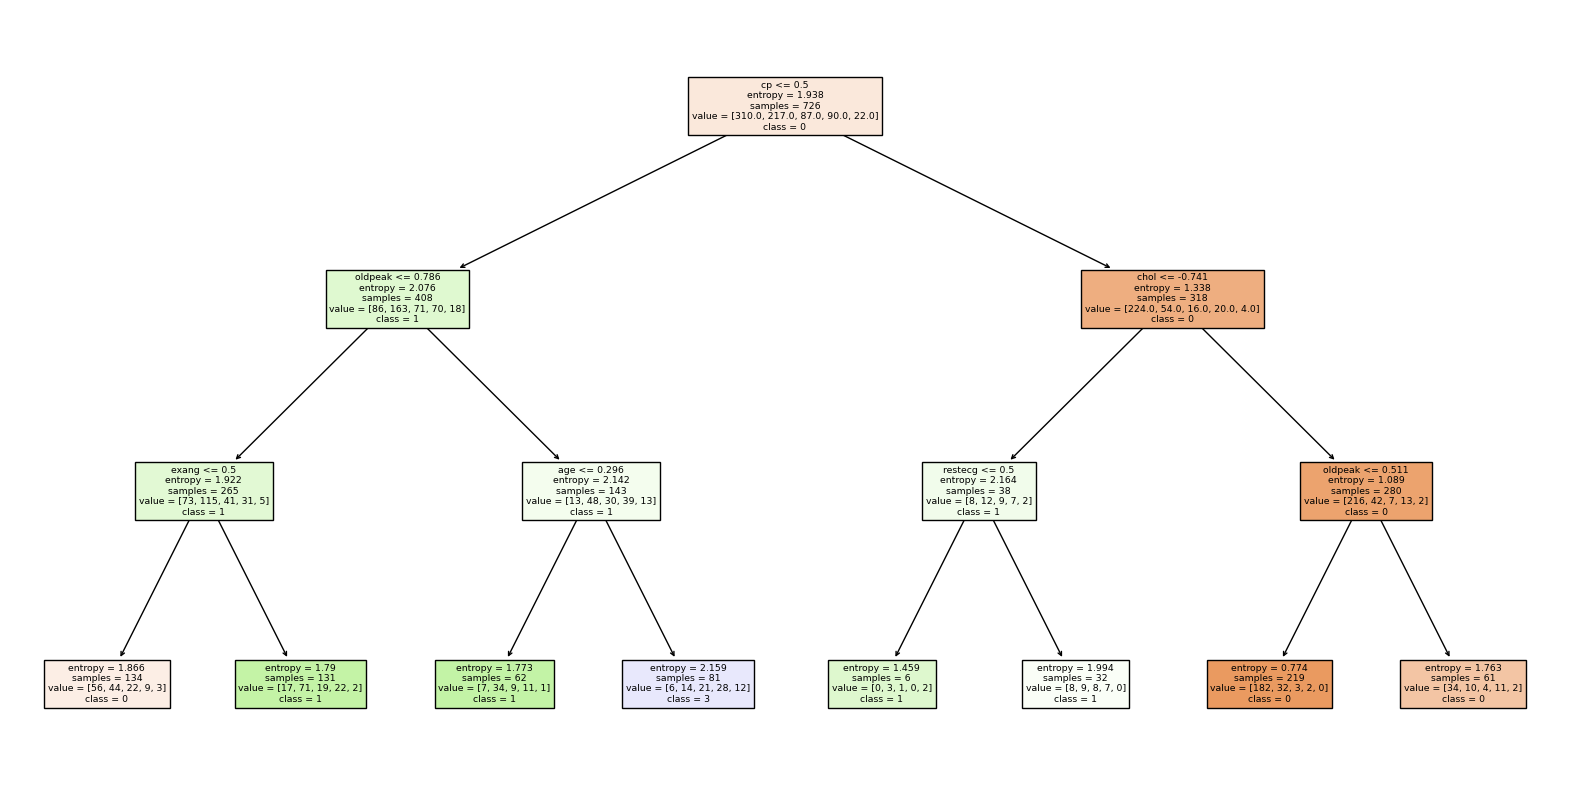

In [67]:
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=X.columns, class_names=['0', '1','2','3','4'])
plt.show()

